In [1]:
import pandas as pd

ri = pd.read_csv('RI_cleaned.csv', nrows = 50000)

drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)

ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.drop(["stop_date", "stop_time"], axis='columns', inplace=True)

ri.set_index('stop_datetime', inplace=True)

c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [2]:
ri.head(2)

# önce dataframe'imizi bir görelim hangi verilerden oluşuyor

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


In [3]:
ri.is_arrested.mean()

# is_arrested sütununun ortalamasını aldım.

0.05182253697146428

In [4]:
type(ri.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
ri.index.hour

# saatleri çekiyor sadece. 

# en son dataframe'imizin indeksi stopdatetime idi ve onu önce datetime tipine çevirerek indeks yapmıştık
# dolayısıyla .hour gibi datetime'ın özelliklerini kullanabiliyorum.

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 22, 23, 23],
           dtype='int64', name='stop_datetime', length=48010)

In [6]:
# ri.index.hour'un içinde kaç unique değerler neler? (24 adet saat değerleri olacak)

ri.index.hour.unique()


Int64Index([ 1, 20, 12,  8, 17, 23,  3,  2,  4,  5, 10, 15, 14,  9,  0, 21, 22,
            13, 16, 11,  7, 19, 18,  6],
           dtype='int64', name='stop_datetime')

In [7]:
ri.index.hour.nunique()

# kaç unique elemanı var? = 24

24

In [8]:
ri.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2006-08-08 22:22:00', '2006-08-08 22:25:00',
               '2006-08-08 22:30:00', '2006-08-08 22:30:00',
               '2006-08-08 22:45:00', '2006-08-08 22:45:00',
               '2006-08-08 22:45:00', '2006-08-08 22:53:00',
               '2006-08-08 23:00:00', '2006-08-08 23:00:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=48010, freq=None)

In [9]:
# indexlediğimizde o bir serie (ri.index) ise ve biz onun içinden hour'lu olan series'i alıp groupby'a atarsam 

# ve sonuna is_arrested dersem saatlere göre tutuklanma durumunu elde etmiş olurum

ri.groupby(ri.index.hour).is_arrested.mean()

# buradaki mean bana tutuklanma oranlarını verecek.

stop_datetime
0     0.091657
1     0.113384
2     0.113103
3     0.084877
4     0.065217
5     0.037975
6     0.020573
7     0.022004
8     0.023802
9     0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64

In [10]:
# bize hourly arrest rate adında Series oluştur demişti.

# yukarda bulduğum saatlik tutuklama oranlarını bu series e atıyorum

hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

In [11]:
hourly_arrest_rate

stop_datetime
0     0.091657
1     0.113384
2     0.113103
3     0.084877
4     0.065217
5     0.037975
6     0.020573
7     0.022004
8     0.023802
9     0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [12]:
import matplotlib.pyplot as plt

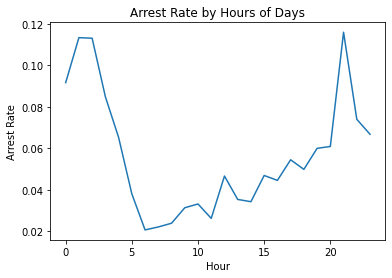

In [13]:
# hourly_arrest_rate. dan sonra tab'a basınca pandas'ın içinde plot fonksiyonu olduğunu gördüm. şimdi bunu kullanacağım.

hourly_arrest_rate.plot()

plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Hours of Days")

plt.show()

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [14]:
ri.head(2)

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


In [15]:
ri.drugs_related_stop.value_counts() 

# drugs_related_stop normalde boolean ama alta int64 yazıyor 
# çünkü burdaki int64, .value_counts() metodunun output'un type'ı
# yani false ve true'nın karşılığında output olarak gelen rakamlar integer..

# 47685 False değerim, 325 True değerim var. demek ki 325 uyuşturucu bağlantılı durdurma var.

False    47685
True       325
Name: drugs_related_stop, dtype: int64

In [16]:
ri.drugs_related_stop.resample("A").mean() 

# A : annual (yıllık)

# her yıl için mean'i aldı

# uyuşturucu ile alakalı durdurmanın yıllık verisini elde ettim.

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006257
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [17]:
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()

annual_drug_rate

# artık annual_drug_rate adında series'imiz oldu.

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006257
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

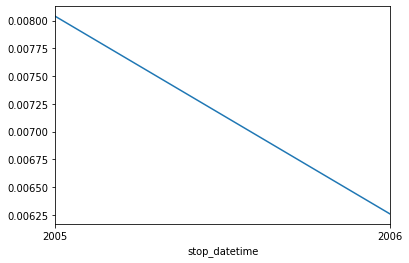

In [18]:
# annual_drug_rate Series'inin indeksinde yıllar, sütununda ise ortalama değerler vardı.
# bunu plotladığımızda bir eksende yıllar olacak bir eksende de bu sayısal ortalamalar olacak şekilde şekli çizecektir.

annual_drug_rate.plot()

plt.show()

# en basit anlamda bir plot çiziyor. hangi değere karşılık ne değer geldiğini gösteriyor.

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [19]:
ri.columns

# sütunlarıma bakayım ve aradığım search_conducted sütununu göreyim.

Index(['id', 'location_raw', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district'],
      dtype='object')

In [20]:
ri.search_conducted.head()

# search_conducted sütunum ne tür değerlerden oluşuyor acaba? 

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
Name: search_conducted, dtype: bool

In [21]:
ri.search_conducted.dropna().astype("int").resample("A").mean()

# missing valueları düşürdükten sonra astype(int) ile bunun tipini integer yaptım.

# yani True ve False ları 1 ve 0 yaptım

# resample() ile örneklem aldım. yıllık alacağım için "A" kullandım.(annual)

stop_datetime
2005-12-31    0.050692
2006-12-31    0.038361
Freq: A-DEC, Name: search_conducted, dtype: float64

In [22]:
annual_search_rate = ri.search_conducted.dropna().astype("int").resample("A").mean()

# search_conducted'i A (annual) olarak resample yapıp ortalamasını aldıktan sonra 
# talimattaki gibi bunu "annual_search_rate" adlı değişkene atıyorum.   

In [23]:
annual_search_rate

stop_datetime
2005-12-31    0.050692
2006-12-31    0.038361
Freq: A-DEC, Name: search_conducted, dtype: float64

In [24]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis = "columns")

# her iki Series'in de indexinde datetime tipinde (stop_datetim adıyla) aynı yıl verileri olduğundan 
# bunları yan yana bu ortak indeks ile concat edip bunları dataframe haline getirebilirim.

In [25]:
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006257,0.038361


In [26]:
# plt.subplot(2,1,1)

# plt.subplot(2,1,2)

# bunu böyle yapmayalım aşağıda farklı bir yolla yapalım

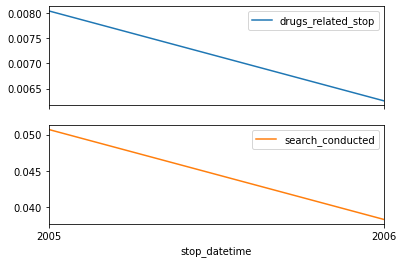

In [27]:
annual.plot(subplots = True)

plt.show()

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [28]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [29]:
# distict sütunumuza bir bakalım. 

ri.district.unique()

# 6 tane değerim var.

array(['Zone K1', 'Zone X4', 'Zone X1', 'Zone K3', 'Zone X3', 'Zone K2'],
      dtype=object)

In [30]:
# kategorical'a çevirirsek ona göre fonksiyon ve metodlar geleceği için bunların yararlarını görebiliyoruz.

In [31]:
ri.district.value_counts()

# hangi değerden ne kadar var?..(histogram gibi birşey)
# bu sıkça kullandığım bir metod.

Zone K3    13554
Zone X4    10563
Zone K2     9707
Zone K1     6809
Zone X3     5460
Zone X1     1917
Name: district, dtype: int64

In [32]:
# bizden violation ve district'in frequency karşılaştırmasını istemişti. şimdi violationa da bakalım.

In [33]:
ri.violation.unique()

array(['Speeding', 'Equipment', 'Other', 'Moving violation',
       'Registration/plates'], dtype=object)

In [34]:
ri.violation.value_counts()

Speeding               36111
Moving violation        6522
Equipment               3022
Registration/plates     1463
Other                    892
Name: violation, dtype: int64

**iki değerin frequency karşılaştırmasını isterse bunu crosstab() ile yapabildiğini bil.**



In [35]:
pd.crosstab(ri.district, ri.violation)

# districtleri index'e aldım. violation'u da sütunlara aldım.

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608
Zone X1,93,643,44,9,1128
Zone X3,342,741,127,102,4148
Zone X4,806,2220,249,609,6679


In [36]:
# bunu bir değişkene atayalım, dataframe yapalım yani

all_zones = pd.crosstab(ri.district, ri.violation)

# bu artık bir dataframe

In [37]:
all_zones.loc["Zone K1" : "Zone K3"]

# bizden istendiği üzere Zone K1'den K3'e kadar seçelim

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608


In [38]:
# şimdi bundan da bir dataframe oluşturalım

k_zones = all_zones.loc["Zone K1" : "Zone K3"]

***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

<function matplotlib.pyplot.show(close=None, block=None)>

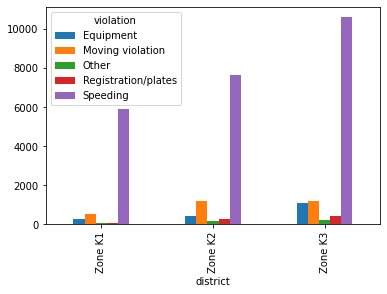

In [39]:
k_zones.plot(kind="bar")

plt.show

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

<function matplotlib.pyplot.show(close=None, block=None)>

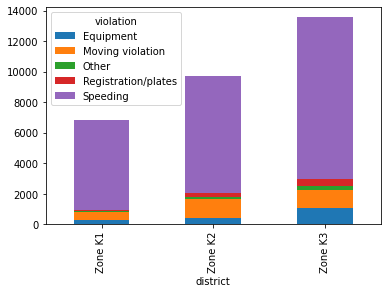

In [40]:
k_zones.plot(kind = "bar", stacked = True)

plt.show

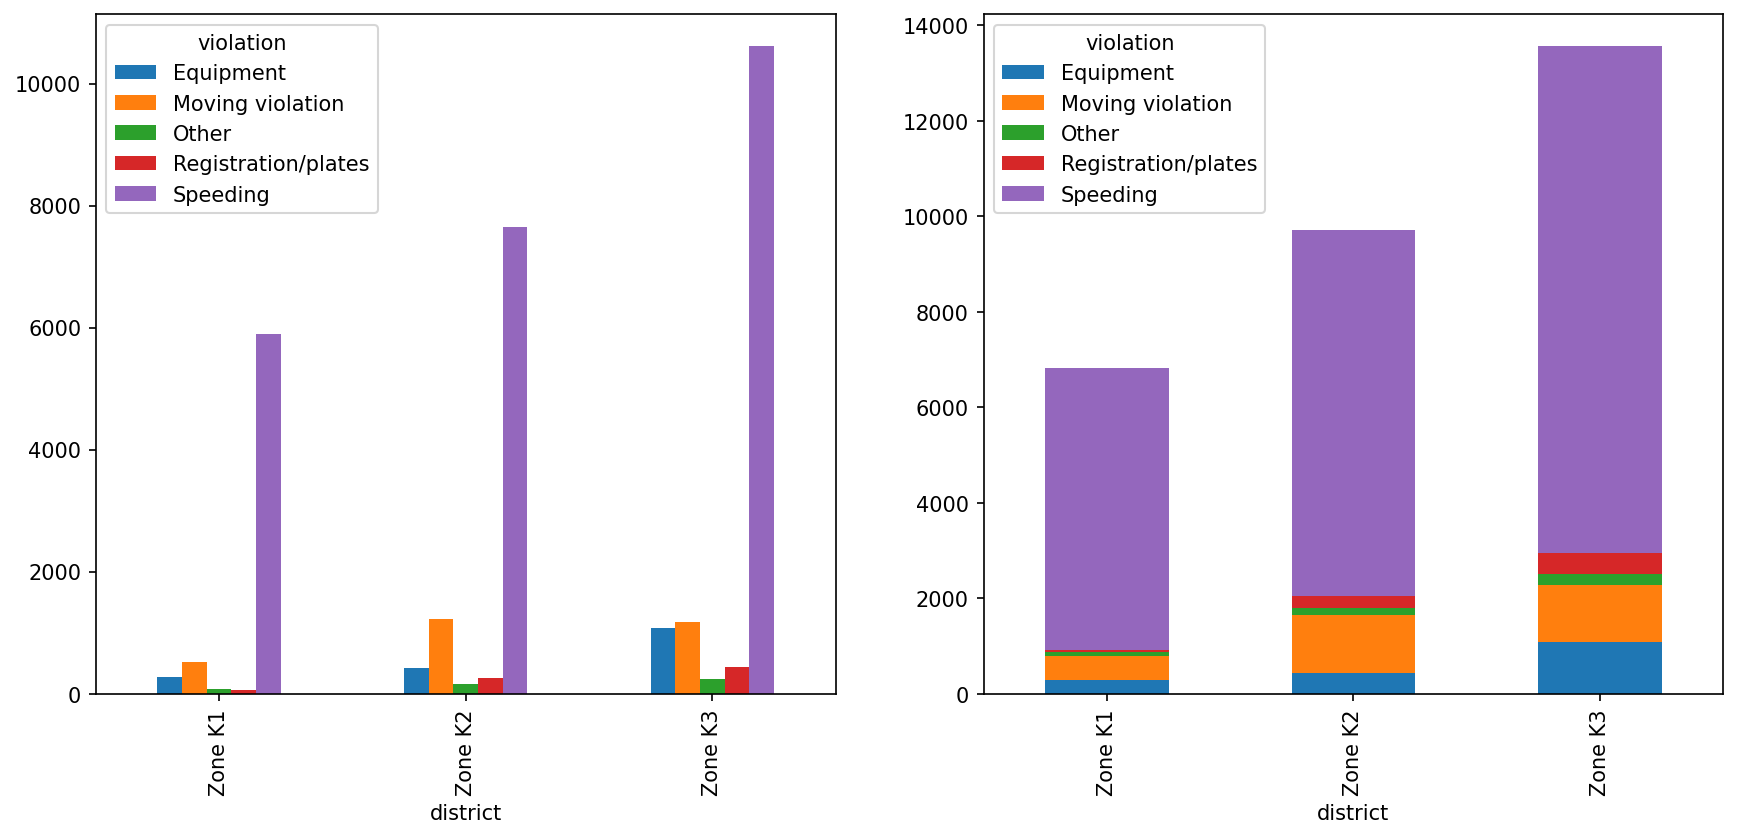

In [41]:
# 8329 joseph hocamın katkısı: 

# yan yana iki plot çizdirip sağda stackleme yaptı.

fig, ax = plt.subplots(1,2, figsize = (14,6),dpi = 150)
k_zones.plot(kind='bar', ax = ax[0]);
k_zones.plot(kind='bar', ax = ax[1], stacked = True);

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [54]:
# önce stop durationa bir bakalım


ri.stop_duration.head()

0     0-15 Min
1    16-30 Min
2          NaN
3     0-15 Min
4     0-15 Min
Name: stop_duration, dtype: object

In [43]:
ri.stop_duration.unique()

# değerler arasında bizden istenenin dışında 3 ve 1 de var. Önce bunları atmamız lazım.

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [44]:
ri = pd.read_csv('RI_cleaned.csv', nrows = 50000)

c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
ri.stop_duration.head()

0     0-15 Min
1    16-30 Min
2          NaN
3     0-15 Min
4     0-15 Min
Name: stop_duration, dtype: object

In [46]:
ri.stop_duration.unique()

# şimdi 2 ve 1 değerlerimin olmadığını gördüm. (50000 satırda yok)

array(['0-15 Min', '16-30 Min', nan, '30+ Min'], dtype=object)

In [47]:
mapping = {"0-15 Min" : 8, "16-30 Min" : 23, "30+ Min" : 45 }

# önce dictionaryimi yaptım

In [48]:
ri["stop_minutes"] = ri.stop_duration.map(mapping)

# stop_duration'a yukarda oluşturduğum mapping değerlerini map olarak uyguladım.
# ve bundan stop_minutes adıyla yeni bir sütun oluşturdum

In [ ]:
# C8366 Harun hocamın kodu:

ri["stop_minutes"] = ri["stop_duration"].replace(mapping).astype("int")

In [51]:
ri.stop_minutes.unique()

array([ 8., 23., nan, 45.])

In [50]:
ri.head(3)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_minutes
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,8.0
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,23.0
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1,NaN


***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [52]:
ri.violation_raw.unique()

array(['Speeding', nan, 'Equipment/Inspection Violation',
       'Call for Service', 'Other Traffic Violation',
       'Registration Violation', 'Violation of City/Town Ordinance',
       'Special Detail/Directed Patrol', 'APB',
       'Motorist Assist/Courtesy', 'Suspicious Person', 'Warrant'],
      dtype=object)

In [ ]:
ri.groupby()

# groupby olduğunu nasıl anlıyoruz? 
# yukardaki unique ların her birini alıyoruz ve onların yanında ortalama zaman değerleri olacak.

In [55]:
ri.groupby("violation_raw").stop_minutes.mean()

# violation_raw'ın içindeki her bir unique değerin stop_minutes ortalamalarını aldım.

violation_raw
APB                                 28.078431
Call for Service                    27.674370
Equipment/Inspection Violation      13.668101
Motorist Assist/Courtesy            15.528409
Other Traffic Violation             14.207298
Registration Violation              17.304170
Special Detail/Directed Patrol      30.902778
Speeding                             9.707133
Suspicious Person                   21.821429
Violation of City/Town Ordinance    11.153846
Warrant                             29.666667
Name: stop_minutes, dtype: float64

In [56]:
stop_length = ri.groupby("violation_raw").stop_minutes.mean()

stop_length
# bu değerleri bir değişkene atadım.

violation_raw
APB                                 28.078431
Call for Service                    27.674370
Equipment/Inspection Violation      13.668101
Motorist Assist/Courtesy            15.528409
Other Traffic Violation             14.207298
Registration Violation              17.304170
Special Detail/Directed Patrol      30.902778
Speeding                             9.707133
Suspicious Person                   21.821429
Violation of City/Town Ordinance    11.153846
Warrant                             29.666667
Name: stop_minutes, dtype: float64

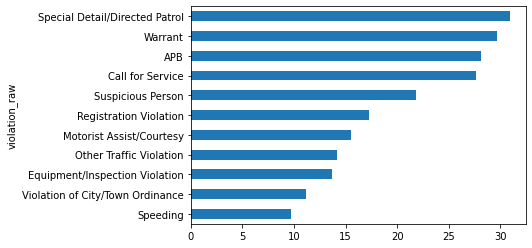

In [57]:
# bu değelerin sort edilmiş haline horizantal bar plot yapacağız.

stop_length.sort_values().plot(kind = "barh" )

plt.show()